In [8]:
from examples.datasets.multiple_examples_no_order_trains import template, dataset

from neuralogic.utils.visualize import draw_model, draw_sample, model_to_dot_source, sample_to_dot_source
from neuralogic.nn import get_evaluator
from neuralogic.core import Backend


neuralogic_evaluator = get_evaluator(Backend.JAVA, template)


In [10]:
print(template)

shape(Y) :- {1} shape(Y, ellipse).
shape(Y) :- {1} shape(Y, rectangle).
shape(Y) :- {1} shape(Y, bucket).
shape(Y) :- {1} shape(Y, hexagon).
shape(Y) :- {1} shape(Y, u_shaped).
length(Y) :- {1} length(Y, short).
length(Y) :- {1} length(Y, long).
sides(Y) :- {1} sides(Y, not_double).
sides(Y) :- {1} sides(Y, double).
roof(Y) :- {1} roof(Y, jagged).
roof(Y) :- {1} roof(Y, arc).
roof(Y) :- {1} roof(Y, none).
roof(Y) :- {1} roof(Y, flat).
roof(Y) :- {1} roof(Y, peaked).
wheels(Y) :- {1} wheels(Y, 2).
wheels(Y) :- {1} wheels(Y, 3).
loadnum(Y) :- {1} loadnum(Y, 0).
loadnum(Y) :- {1} loadnum(Y, 1).
loadnum(Y) :- {1} loadnum(Y, 2).
loadnum(Y) :- {1} loadnum(Y, 3).
loadshape(Y) :- {1} loadshape(Y, hexagon).
loadshape(Y) :- {1} loadshape(Y, triangle).
loadshape(Y) :- {1} loadshape(Y, diamond).
loadshape(Y) :- {1} loadshape(Y, rectangle).
loadshape(Y) :- {1} loadshape(Y, circle).
vagon(Y) :- {1} shape(Y), {1} length(Y), {1} sides(Y), {1} wheels(Y), {1} loadnum(Y), {1} loadshape(Y), {1} roof(Y).
t

### Draw graph of the model (template)

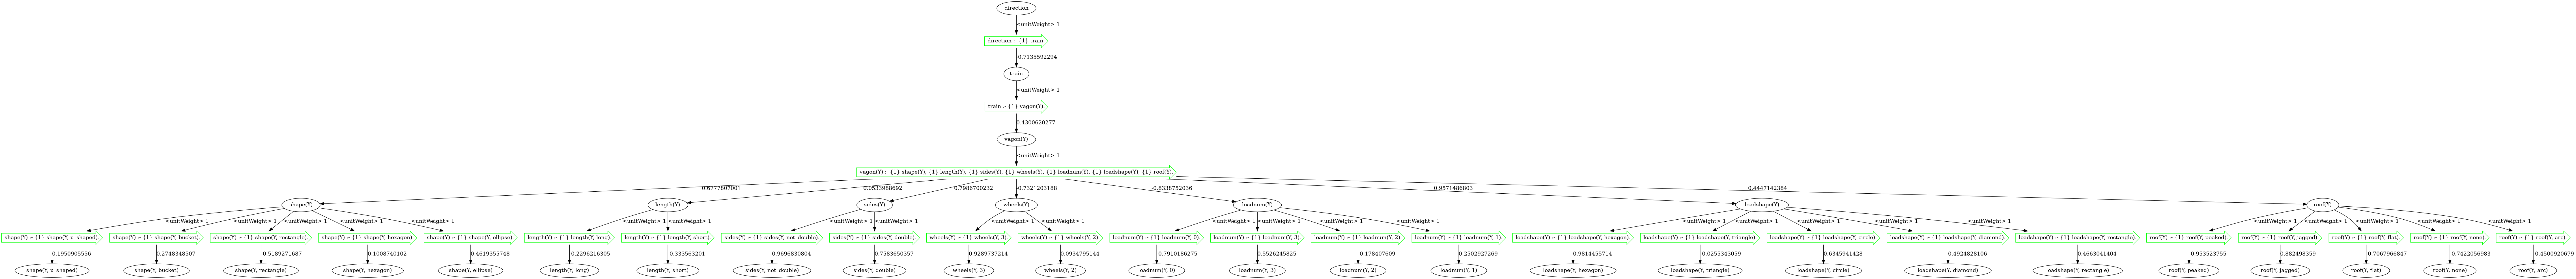

In [9]:
draw_model(neuralogic_evaluator.model, img_type="png")

In [12]:
built_dataset = neuralogic_evaluator.build_dataset(dataset)

### Draw graph of examples

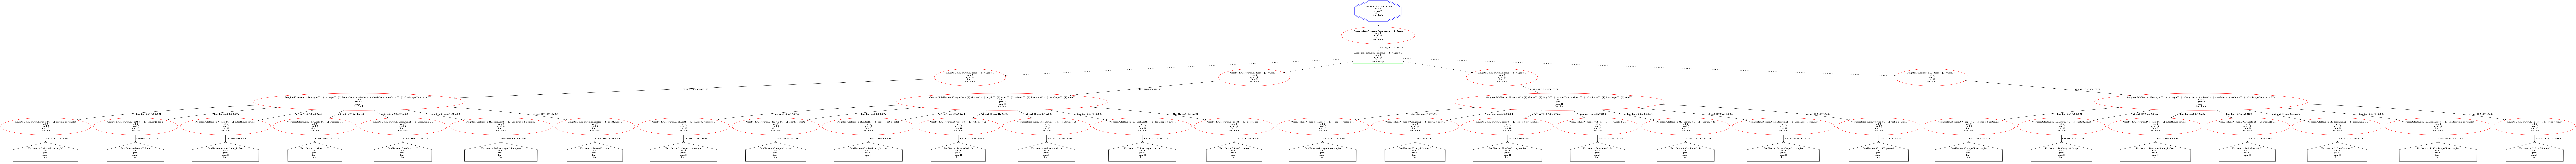

In [15]:
draw_sample(built_dataset[0], img_type="png")

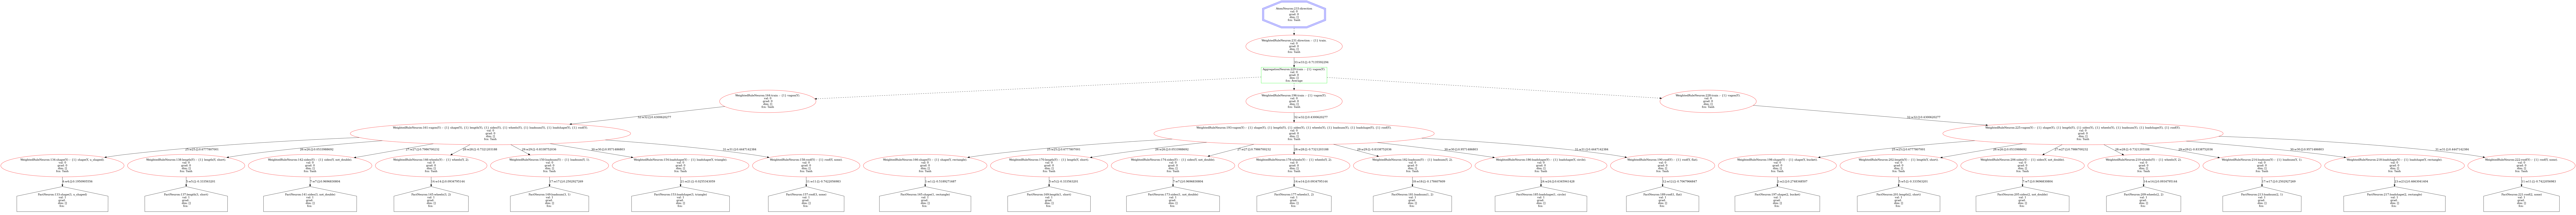

In [16]:
draw_sample(built_dataset[1], img_type="png")

### Get dot sources (model and examples)

In [19]:
print(model_to_dot_source(neuralogic_evaluator.model))

digraph G {
1146662649[label="shape(Y)"]
-2048084323[label="shape(Y) :- {1} shape(Y, u_shaped).", shape=rarrow, color=green]
1146662649 -> -2048084323[label="<unitWeight> 1"]
1100220293[label="shape(Y, u_shaped)"]
-2048084323 -> 1100220293[label="0.1950905556", color=black]
1280810930[label="shape(Y) :- {1} shape(Y, bucket).", shape=rarrow, color=green]
1146662649 -> 1280810930[label="<unitWeight> 1"]
134148250[label="shape(Y, bucket)"]
1280810930 -> 134148250[label="0.2748348507", color=black]
-1674063345[label="shape(Y) :- {1} shape(Y, rectangle).", shape=rarrow, color=green]
1146662649 -> -1674063345[label="<unitWeight> 1"]
1474241271[label="shape(Y, rectangle)"]
-1674063345 -> 1474241271[label="-0.5189271687", color=black]
1706103864[label="shape(Y) :- {1} shape(Y, hexagon).", shape=rarrow, color=green]
1146662649 -> 1706103864[label="<unitWeight> 1"]
559441184[label="shape(Y, hexagon)"]
1706103864 -> 559441184[label="0.1008740102", color=black]
316190214[label="shape(Y) :- {1} sha

In [20]:
print(sample_to_dot_source(built_dataset[0]))

digraph G {
0 [shape=house, color=black, label="FactNeuron:0:shape(2, rectangle)
val: 1
grad: 
dim: []
fcn: 
"]

1 [shape=ellipse, color=red, label="WeightedRuleNeuron:1:shape(Y) :- {1} shape(Y, rectangle).
val: 0
grad: 0
dim: []
fcn: Tanh
"]
1 -> 0 [label="1:w1:[]:-0.5189271687"]

4 [shape=house, color=black, label="FactNeuron:4:length(2, long)
val: 1
grad: 
dim: []
fcn: 
"]

5 [shape=ellipse, color=red, label="WeightedRuleNeuron:5:length(Y) :- {1} length(Y, long).
val: 0
grad: 0
dim: []
fcn: Tanh
"]
5 -> 4 [label="6:w6:[]:-0.2296216305"]

8 [shape=house, color=black, label="FactNeuron:8:sides(2, not_double)
val: 1
grad: 
dim: []
fcn: 
"]

9 [shape=ellipse, color=red, label="WeightedRuleNeuron:9:sides(Y) :- {1} sides(Y, not_double).
val: 0
grad: 0
dim: []
fcn: Tanh
"]
9 -> 8 [label="7:w7:[]:0.9696830804"]

12 [shape=house, color=black, label="FactNeuron:12:wheels(2, 3)
val: 1
grad: 
dim: []
fcn: 
"]

13 [shape=ellipse, color=red, label="WeightedRuleNeuron:13:wheels(Y) :- {1} wheels(Y,